**[Machine Learning Course Home Page](https://www.kaggle.com/learn/machine-learning)**

---


This exercise will test your ability to read a data file and understand statistics about the data.

In later exercises, you will apply techniques to filter the data, build a machine learning model, and iteratively improve your model.

The course examples use data from Melbourne. To ensure you can apply these techniques on your own, you will have to apply them to a new dataset (with house prices from Iowa).

The exercises use a "notebook" coding environment.  In case you are unfamiliar with notebooks, we have a [90-second intro video](https://www.youtube.com/watch?v=4C2qMnaIKL4).

# Exercises

Run the following cell to set up code-checking, which will verify your work as you go.

In [1]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex2 import *
print("Setup Complete")

Setup Complete


## Step 1: Loading Data
Read the Iowa data file into a Pandas DataFrame called `home_data`.

In [2]:
import pandas as pd
import numpy as np
# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

# Fill in the line below to read the file into a variable home_data
home_data = pd.read_csv(iowa_file_path)

# Call line below with no argument to check that you've loaded the data correctly
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [3]:
# Lines below will give you a hint or solution code
#step_1.hint()
#step_1.solution()

## Step 2: Review The Data
Use the command you learned to view summary statistics of the data. Then fill in variables to answer the following questions

# Print summary statistics in next line
home_data.head()
home_data.shape

In [4]:
home_data.dropna(inplace=False)
home_data.head() 
#home_data.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

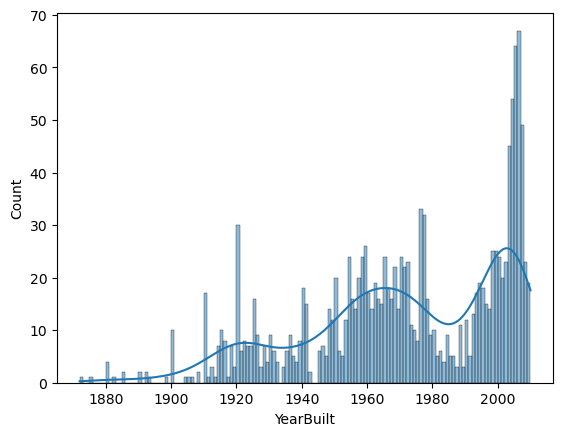

In [6]:
import seaborn as sns
sns.histplot(home_data['YearBuilt'], binwidth=1, kde=True)

In [7]:
# What is the average lot size (rounded to nearest integer)?
data=home_data['LotArea']
# data_pool=data['LotFrontage']
# print(data)
avg_lot_size = int(sum(data)/len(data)) +1
#print(int(avg_lot_size))
# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_data = home_data['YearBuilt']
newest_home_age=2023-np.amax(newest_home_data)
# for item in newest_home_data:
#     newest_home_age=max(newest_home_age,item)
    
# Checks your answers
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [8]:
#step_2.hint()
#step_2.solution()

## Think About Your Data

The newest house in your data isn't that new.  A few potential explanations for this:
1. They haven't built new houses where this data was collected.
1. The data was collected a long time ago. Houses built after the data publication wouldn't show up.

If the reason is explanation #1 above, does that affect your trust in the model you build with this data? What about if it is reason #2?

How could you dig into the data to see which explanation is more plausible?

Check out this **[discussion thread](https://www.kaggle.com/learn-forum/60581)** to see what others think or to add your ideas.

# Keep Going

You are ready for **[Your First Machine Learning Model](https://www.kaggle.com/dansbecker/your-first-machine-learning-model).**


---
**[Machine Learning Course Home Page](https://www.kaggle.com/learn/machine-learning)**

